# KNN

In [6]:
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,
        inplace=True, errors='ignore')
# Missing value
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.dropna(inplace=True)

# Label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for var in ['Sex','Embarked']:
    df[var] = encoder.fit_transform(df[var]) 
    
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

In [9]:
k_score = []
k_values = range(1,268)

for k in k_values:

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('Pclass', axis=1), df['Pclass'], test_size=0.3, random_state=0)

    # Train model
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    k_score.append(score)

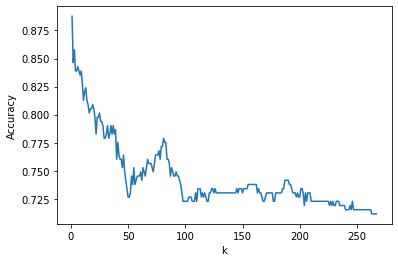

In [10]:
plt.plot(k_values, k_score)
plt.xlabel("k")
plt.ylabel("Accuracy");

In [11]:
max(k_score)

0.8876404494382022

# SVM

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [13]:
def train_model(y_var):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(y_var, axis=1), df[y_var], test_size=0.3, random_state=0)

    # Train
    clf = svm.SVC(gamma=0.01, C=100)
    clf.fit(X_train, y_train)

    # Evaluate
    return accuracy_score(y_test, clf.predict(X_test), normalize=True)

df_scores = pd.DataFrame(data=[], columns=['Feature', 'Accuracy'])
features  = ['Survived', 'Sex', 'Embarked', 'Parch', 'SibSp']

for y_var in features:
    df_scores.loc[len(df_scores)] = [y_var, train_model(y_var)]

df_scores.sort_values(by=['Accuracy'], ascending=False)

,Feature,Accuracy
3,Parch,0.794007
2,Embarked,0.756554
4,SibSp,0.752809
0,Survived,0.745318
1,Sex,0.730337
